# Project 2 - Classification
## Predict customers likely to respond to a marketing campaign

### MODEL : Logistic Regression
#### This notebook has the Logistic Regression Model
- We used the excel 'transformed_data1.xlsx'

# **Group W**
- Ana Rita Mateus - 20241483;
- Gabriel Fábrega - 20241530;
- Gift Kimbini Musharwa - 20241190;
- Marta Filipe - 20240211;
- Wilson Lima - 20241183.

# 1. Initializations and data loading

In [ ]:
# Loading packages
!pip install joypy
!pip install pyampute
!pip install autoimpute
!pip install fancyimpute
!pip install yellowbrick

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns
import joypy
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import os
from scipy.stats import chi2_contingency
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from scipy.stats import chi2
from pyampute.exploration.mcar_statistical_tests import MCARTest
from autoimpute.imputations import MultipleImputer
from scipy.stats import f_oneway
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from fancyimpute import IterativeImputer
from sklearn.neighbors import NearestNeighbors
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import random
from yellowbrick.classifier import ROCAUC


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\Filipe\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\Filipe\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\Filipe\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\Filipe\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\Filipe\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [ ]:
# Loading the dataset and visualizing summary statistics
!pip install openpyxl
Z = pd.read_excel('transformed_data1.xlsx', engine='openpyxl')
Z.describe(include='all').T


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\Filipe\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Education,2240,5,Graduation,1127,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital_Status,2240,6,Married,864,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Income,2240.0,NaN,NaN,NaN,51820.473097,20984.862287,1730.0,35233.5,51277.0,68413.25,118216.125
Recency,2240.0,NaN,NaN,NaN,49.109375,28.962453,0.0,24.0,49.0,74.0,99.0
Purchases_With_Discount,2240.0,NaN,NaN,NaN,0.242931,0.249713,0.0,0.0,0.30103,0.477121,0.778151
Visits_Web_LastMonth,2240.0,NaN,NaN,NaN,0.661326,0.260338,0.0,0.477121,0.778151,0.845098,1.113943
Has_Complained,2240.0,NaN,NaN,NaN,0.009375,0.096391,0.0,0.0,0.0,0.0,1.0
Response,2240.0,NaN,NaN,NaN,0.149107,0.356274,0.0,0.0,0.0,0.0,1.0
Age,2240.0,NaN,NaN,NaN,45.096875,11.694144,18.0,37.0,44.0,55.0,74.0
Year,2240.0,NaN,NaN,NaN,2013.028125,0.684554,2012.0,2013.0,2013.0,2013.0,2014.0


# 2. Data Exploration

- The Data exploration in the notebook x and y is the same.

In [ ]:
# Show top rows
Z.head()

,Education,Marital_Status,Income,Recency,Purchases_With_Discount,Visits_Web_LastMonth,Has_Complained,Response,Age,Year,Month,TotalSpent,TotalAcceptedCampaigns,TotalPurchases,TotalDependents
0,Graduation,Single,58138.0,58,0.477121,0.845098,0,1,57,2012,9,12.437923,0,1.060892,0
1,Graduation,Single,46344.0,38,0.301030,0.698970,0,0,60,2014,3,2.120574,0,0.114287,2
2,Graduation,Together,71613.0,26,0.000000,0.602060,0,0,49,2013,8,10.091982,0,0.591409,0
3,Graduation,Together,26646.0,26,0.301030,0.778151,0,0,30,2014,2,4.421604,0,-0.044269,1
4,PhD,Married,58293.0,94,0.698970,0.698970,0,0,33,2014,1,9.514639,0,0.650999,1


Observations:

Here, we can identify three additional variables: **ID**, **Z_CostContact**, and **Z_Revenue**:
- **ID**  represents the client’s identification number;
- **Z_CostContact** represents the cost of contacting a client;
- **Z_Revenue**  represents the revenue generated if a client responds to a campaign.

**Z_CostContact** and **Z_Revenue** will be used to evaluate the model in terms of costs and profits for the company, depending on whether customers respond to the campaigns or not.

In [ ]:
# Check the type of each variable

Z.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Education                2240 non-null   object 
 1   Marital_Status           2240 non-null   object 
 2   Income                   2240 non-null   float64
 3   Recency                  2240 non-null   int64  
 4   Purchases_With_Discount  2240 non-null   float64
 5   Visits_Web_LastMonth     2240 non-null   float64
 6   Has_Complained           2240 non-null   int64  
 7   Response                 2240 non-null   int64  
 8   Age                      2240 non-null   int64  
 9   Year                     2240 non-null   int64  
 10  Month                    2240 non-null   int64  
 11  TotalSpent               2240 non-null   float64
 12  TotalAcceptedCampaigns   2240 non-null   int64  
 13  TotalPurchases           2240 non-null   float64
 14  TotalDependents         

We noticed missing values in *Income*, *MntWines*, *MntFruits* and *MntGoldProds*

## 3. Data Preparation
- Lorgist Regresssion: One hot encoding

Before applying the Logistic Regression model, we need to do the encode for the categorical variables.

In [ ]:
# Encode categorical features into dummy variables

cols = ['Marital_Status', 'Education']
X = pd.get_dummies(Z, columns=cols, drop_first=True)

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Income                   2240 non-null   float64
 1   Recency                  2240 non-null   int64  
 2   Purchases_With_Discount  2240 non-null   float64
 3   Visits_Web_LastMonth     2240 non-null   float64
 4   Has_Complained           2240 non-null   int64  
 5   Response                 2240 non-null   int64  
 6   Age                      2240 non-null   int64  
 7   Year                     2240 non-null   int64  
 8   Month                    2240 non-null   int64  
 9   TotalSpent               2240 non-null   float64
 10  TotalAcceptedCampaigns   2240 non-null   int64  
 11  TotalPurchases           2240 non-null   float64
 12  TotalDependents          2240 non-null   int64  
 13  Marital_Status_Married   2240 non-null   bool   
 14  Marital_Status_Other    

# 3. Modeling - Logistic Regression

Logistic regression was chosen as a model for this classification problem due to its simplicity, interpretability, and solid statistical foundation.
It is computationally efficient and provides direct probability estimates, which are valuable for decision-making and risk assessment.
The model’s coefficients offer clear insight into the influence of each feature on the predicted outcome, making it especially useful when interpretability is important. While logistic regression assumes a linear relationship between the input variables and the log-odds of the target, it serves as a strong baseline model before exploring more complex approaches. Despite limitations in capturing non-linear interactions or handling outliers, it performs well when the data is properly preprocessed and the underlying assumptions are reasonably met.

In [ ]:
# Create the Target
y = X['Response']
X = X.drop('Response', axis=1)

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.datasets import make_classification
from collections import Counter

# Creating a synthetic dataset with imbalanced classes
X, y = make_classification(n_classes=2, weights=[0.9, 0.1], n_samples=1000, random_state=42)

# Checking the original class distribution
print("Original class distribution:", Counter(y))

# Initializing the RandomOverSampler
ros = RandomOverSampler(random_state=42)

# Applying oversampling to balance the dataset
X_res, y_res = ros.fit_resample(X, y)

# Checking the class distribution after oversampling
print("Class distribution after oversampling:", Counter(y_res))

Original class distribution: Counter({np.int64(0): 897, np.int64(1): 103})
Class distribution after oversampling: Counter({np.int64(0): 897, np.int64(1): 897})


In [ ]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression

# Training a logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

In [ ]:
# Predicting on the training and testing sets
y_pred_train = model.predict(X_train_scaled)
y_pred_test = model.predict(X_test_scaled)

Counter({np.int64(0): 725, np.int64(1): 710})


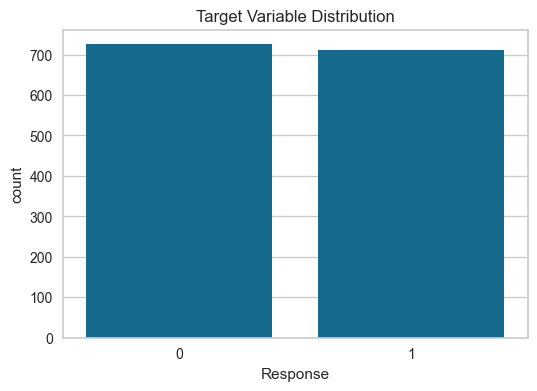

0    0.505226
1    0.494774
Name: proportion, dtype: float64


In [ ]:
import collections
# Display raw counts with Counter
print(collections.Counter(y_train))

# Convert to Series for visualization with seaborn and value_counts
y_train_series = pd.Series(y_train)

# Visualize the target variable distribution
fig, ax = plt.subplots(figsize=(6, 4))
sns.countplot(x="Response", data=pd.DataFrame({'Response': y_train_series}), ax=ax)
plt.title("Target Variable Distribution")
plt.show()

# Display the normalized distribution of the target variable
print(y_train_series.value_counts(normalize=True))

# 4. Evaluation A

Evaluating the model after it has been applied is essential to ensure its effectiveness, identify potential issues such as overfitting or bias, and confirm that it generalizes well to new and unseen data.

In [ ]:
# Function to create dataframe with metrics
def performanceMetricsDF(metricsObj, yTrain, yPredTrain, yTest, yPredTest):
  measures_list = ['ACCURACY','PRECISION', 'RECALL','F1 SCORE','AUC']
  train_results = [metricsObj.accuracy_score(yTrain, yPredTrain),
                metricsObj.precision_score(yTrain, yPredTrain),
                metricsObj.recall_score(yTrain, yPredTrain),
                metricsObj.f1_score(yTrain, yPredTrain),
                metricsObj.roc_auc_score(yTrain, yPredTrain)
                ]
  test_results = [metricsObj.accuracy_score(yTest, yPredTest),
               metricsObj.precision_score(yTest, yPredTest),
               metricsObj.recall_score(yTest, yPredTest),
               metricsObj.f1_score(yTest, yPredTest),
               metricsObj.roc_auc_score(yTest, yPredTest)
               ]
  resultsDF = pd.DataFrame({'Measure': measures_list, 'Train': train_results, 'Test':test_results})
  return(resultsDF)

In [ ]:
# Function to plot confusion matrix
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    ax = sns.heatmap(cf,annot=box_labels, fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)

    if title:
        plt.title(title)

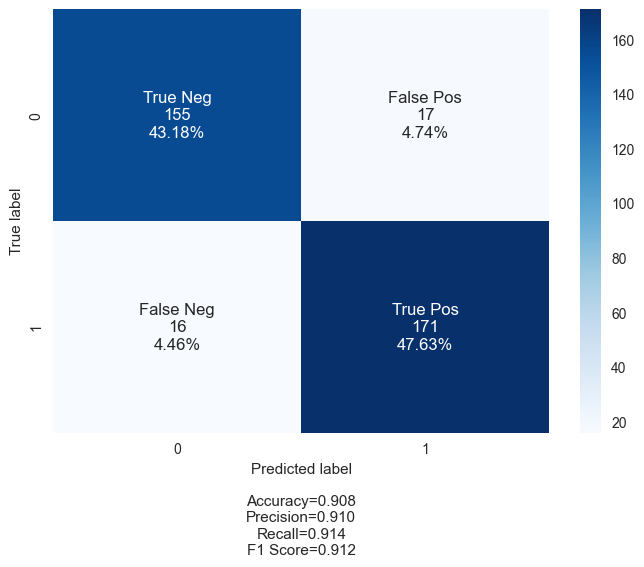

In [ ]:
from sklearn import metrics

cf = metrics.confusion_matrix(y_test,y_pred_test)

labels = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
categories = [0, 1]

make_confusion_matrix(cf,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues')


Observations:

**Confusion Matrix Breakdown**
- True Negatives (True Neg - 155 - 43.18%): Cases correctly predicted as not responding to the campaign (class 0).This corresponds to €465 in predicted contact costs (155 clients × €3 per contact) and a real loss of €1705 (155 clients * €11 per response) in profit.
- False Positives (False Pos - 17 - 4.74%): Cases predicted as responding to the campaign (class 1), but who actually did not respond (class 0). This represents €51 (17 clients × €3 per contact) in predicted contact costs for clients incorrectly predicted to respond. Additionally, we are overestimating €187 (17 clients * €11 per response)in profit that won’t actually materialize.
- False Negatives (False Neg - 16 - 4.46%): Cases predicted as not responding (class 0), but who actually responded to the campaign (class 1). This results in €176 (16 clients * €11 per response) less profit than expected.
- True Positives (True Pos - 171 - 47.63%): Cases correctly predicted as responding to the campaign (class 1).  This corresponds to a real contact cost of €513 (171 clients × €3 per contact) and a real profit of €1881 (171 clients * €11 per response).


Model evaluation metrics:
- Accuracy: 0.908 — The model correctly predicted 90.8% of all samples.
- Precision: 0.910 — Among all instances predicted as responders (class 1), 91.0% were correctly classified as actual responders.
- Recall: 0.914 — The model correctly identified 91.4% of the actual responders.
- F1 Score: 0.912 — A high value (91.2%) indicating excellent balance between precision and recall in identifying responders.

**Conclusion:**

The model demonstrates remarkably high performance across all metrics. Overall accuracy is excellent, and both precision and recall for the responder class (class 1) are very high and well balanced, resulting in a high F1 Score.
<p> This suggests the model is highly effective at distinguishing between those who will respond and those who will not, with few errors of either type.

In [ ]:

results_df = performanceMetricsDF(metrics,y_train, y_pred_train, y_test, y_pred_test)
results_df

,Measure,Train,Test
0,ACCURACY,0.878049,0.908078
1,PRECISION,0.879433,0.909574
2,RECALL,0.873239,0.914439
3,F1 SCORE,0.876325,0.912000
4,AUC,0.877999,0.907801


**Metrics Interpretation**
- Accuracy
Represents the proportion of correct predictions out of the total.
    - Train: 0.878 (87.8%)
    - Test: 0.908 (90.8%)
Accuracy on the test set is slightly higher than on the training set, which is a positive sign of generalization.

- Precision
Of all instances predicted as positive, how many were actually correct.
    - Train: 0.879 (87.9%)
    - Test: 0.910 (91.0%)
Precision is also slightly better on the test set, indicating reliable positive predictions.

- Recall (Sensitivity)
Proportion of actual positive cases correctly identified by the model.
    - Train: 0.873 (87.3%)
    - Test: 0.914 (91.4%)
Recall shows a noticeable improvement on the test set, suggesting a better ability to detect true positives.

- F1 Score:
The harmonic mean of precision and recall — useful for evaluating overall performance, especially with class imbalance.
    - Train: 0.876 (87.6%)
    - Test: 0.912 (91.2%)
The F1 Score reflects a strong and balanced performance, with a clear gain on the test set.

- AUC (Area Under the ROC Curve)
Measures the model’s ability to distinguish between positive and negative classes. Values closer to 1 indicate better performance.
    - Train: 0.878 (87.8%)
    - Test: 0.908 (90.8%)
The AUC is slightly higher on the test set, reinforcing the model's solid performance.

**Overall Analysis**
The results show that the model performs very well on both training and test data. It is encouraging to see that the test metrics are slightly better or very close to the training metrics, indicating good generalization to unseen data and no clear signs of overfitting.

**Conclusion:**
This model appears to be robust and effective for the classification task, with consistently high scores across all metrics and strong predictive power. The results show no signs of overfitting, which is a strong indication that the model is suitable for real-world application.

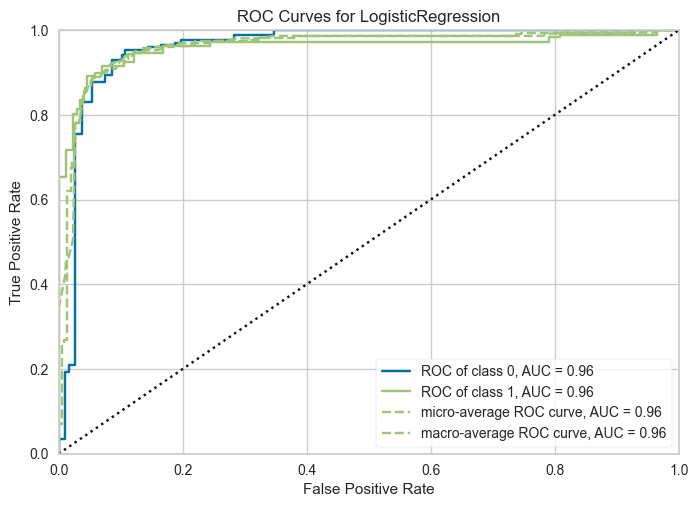

<Axes: title={'center': 'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [ ]:
# ROC curve
visualizer = ROCAUC(model, classes=['0','1'])
visualizer.fit(X_train_scaled, y_train)
visualizer.score(X_test_scaled, y_test)
visualizer.show()

Observations:

The AUC value (0.96 for all curves in this case) represents the area under the ROC curve. It provides a single, comprehensive measure of the model’s overall performance across all possible classification thresholds. An AUC close to 1.0 indicates excellent model performance, demonstrating a strong ability to distinguish between the two classes.

# 5. Tuning with treshold adjusting

Even after obtaining a good model, we decided to further improve its performance by searching for an optimal decision threshold.

In [ ]:
thresholds = np.arange(0.0, 1.01, 0.01)

In [ ]:
# Get predicted probabilities from your trained pipeline
y_proba = model.predict_proba(X_test_scaled)[:, 1] # Get the probability of the positive class

In [ ]:
profits = []
for t in thresholds:
    y_pred = (y_proba >= t).astype(int)
    TP = np.sum((y_test == 1) & (y_pred == 1))
    FP = np.sum((y_test == 0) & (y_pred == 1))

    revenue = 11 * TP
    cost = 3 * (TP + FP)
    net_profit = revenue - cost
    profits.append(net_profit)

# Find threshold with max profit
best_threshold = thresholds[np.argmax(profits)]
max_profit = np.max(profits)

print(f"Best threshold for max profit: {best_threshold:.3f} (Profit: {max_profit}€)")

Best threshold for max profit: 0.410 (Profit: 1353€)


This code aims to find the optimal decision threshold that maximizes profit in a binary classification problem.
<p> It calculates true positives (TP) and false positives (FP) for each, then computes revenue and cost.

In [ ]:
# Apply your custom threshold
threshold = best_threshold
y_pred_test1 = (y_proba >= threshold).astype(int)

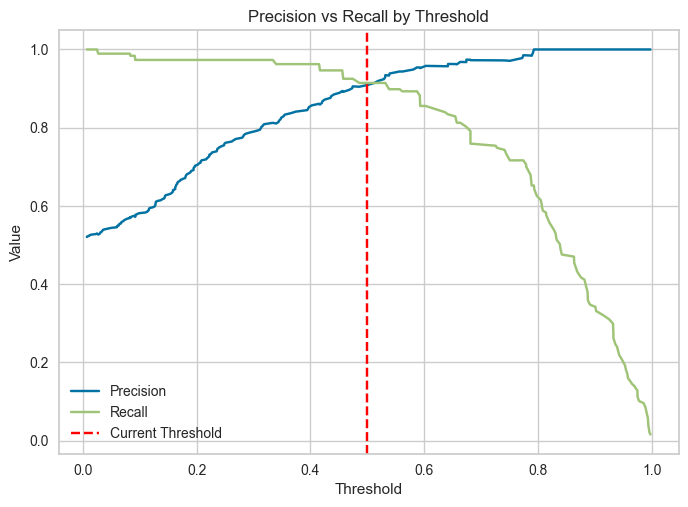

In [ ]:
from sklearn.metrics import precision_recall_curve

prec, rec, thresholds = precision_recall_curve(y_test, y_proba)

plt.plot(thresholds, prec[:-1], label='Precision')
plt.plot(thresholds, rec[:-1], label='Recall')
plt.axvline(0.5, color='red', linestyle='--', label='Current Threshold')
plt.xlabel('Threshold')
plt.ylabel('Value')
plt.title('Precision vs Recall by Threshold')
plt.legend()
plt.grid(True)
plt.show()


Observations:

The graph illustrates the relationship between precision (blue) and recall (orange) as a function of the decision threshold in a binary classification model, with a dashed red vertical line indicating the current threshold (around 0.5). As the threshold increases, precision improves—reflecting fewer false positives—while recall decreases, as the model becomes more conservative and misses some true positives. This reveals a clear trade-off: low thresholds yield high recall but low precision, whereas high thresholds do the opposite.
<p> The current threshold appears to balance both metrics, likely optimizing the F1-score. Overall, the graph demonstrates how threshold selection directly affects model performance, especially in scenarios where both false positives and false negatives carry significant costs.

# 6. Evaluation B

After applying the calculated threshold, we proceeded to evaluate the model in order to assess its performance

In [ ]:
# Function to plot confusion matrix - Adapted from https://github.com/DTrimarchi10/confusion_matrix/blob/master/cf_matrix.py
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html

    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    ax = sns.heatmap(cf,annot=box_labels, fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)

    if title:
        plt.title(title)

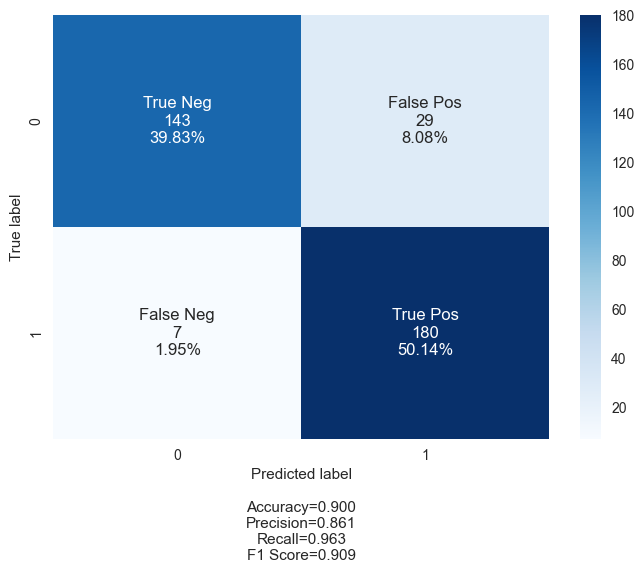

In [ ]:
# Show the confusion matrix
cf = metrics.confusion_matrix(y_test,y_pred_test1)
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['0', '1']
make_confusion_matrix(cf,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues')

Observations:

**Confusion Matrix Breakdown**
- True Negatives (True Neg - 143 - 43.18%): Cases correctly predicted as not responding to the campaign (class 0).This corresponds to €429 in predicted contact costs (143 clients × €3 per contact) and a real loss of €1573(143 clients * €11 per response) in profit.
- False Positives (False Pos - 29 - 4.74%): Cases predicted as responding to the campaign (class 1), but who actually did not respond (class 0). This represents €87 (29 clients × €3 per contact) in predicted contact costs for clients incorrectly predicted to respond. Additionally, we are overestimating €319 (29 clients * €11 per response)in profit that won’t actually materialize.
- False Negatives (False Neg - 7 - 4.46%): Cases predicted as not responding (class 0), but who actually responded to the campaign (class 1). This results in €77 (7 clients * €11 per response) less profit than expected.
- True Positives (True Pos - 180 - 47.63%): Cases correctly predicted as responding to the campaign (class 1).  This corresponds to a real contact cost of €540 (180 clients × €3 per contact) and a real profit of €1980 (180 clients * €11 per response).


Model evaluation metrics:
- Accuracy: 0.900 — The model correctly predicted 90% of all samples.
- Precision: 0.861 — Of all cases predicted as responders (class 1), 86.1% actually responded.
- Recall: 0.963— The model correctly identified 96.3% of the actual responders.
- F1 Score: 0.909 — A high value (91%) indicating excellent balance between precision and recall in identifying responders.

**Conclusion:**

The model demonstrates remarkably high performance across all metrics. Overall accuracy is excellent, and both precision and recall for the responder class (class 1) are very high and well balanced, resulting in a high F1 Score. This suggests the model is highly effective at distinguishing between those who will respond and those who will not, with few errors of either type.

In [ ]:
resultsDF = performanceMetricsDF(metrics, y_train, y_pred_train, y_test, y_pred_test1)
resultsDF

,Measure,Train,Test
0,ACCURACY,0.878049,0.899721
1,PRECISION,0.879433,0.861244
2,RECALL,0.873239,0.962567
3,F1 SCORE,0.876325,0.909091
4,AUC,0.877999,0.896981


**Metrics Interpretation**

- Accuracy
    - Train: 0.878 (87.8%)
    - Test: 0.899 (90.0%) Accuracy on the test set is slightly higher than on the training set, which is a positive sign of generalization.

- Precision
    - Train: 0.879 (87.9%)
    - Test: 0.861 (86.1%) Precision is slightly lower on the test set compared to the training set, suggesting that while the model's positive predictions on unseen data are still good, it might have a slightly higher rate of false positives than on the training data.

- Recall (Sensitivity)
    - Train: 0.873 (87.3%)
    - Test: 0.963 (96.3%) Recall shows a significant improvement on the test set, indicating a much better ability to detect true positives in unseen data. This metrics is the only that seams overfitting.

- F1 Score
    - Train: 0.876 (87.6%)
    - Test: 0.909 (90.9%) The F1 Score reflects a strong and balanced performance, with a clear gain on the test set, primarily driven by the improved recall.

- AUC (Area Under the ROC Curve)
    - Train: 0.878 (87.8%)
    - Test: 0.897 (89.7%) The AUC is slightly higher on the test set, reinforcing the model's solid performance in distinguishing between classes on unseen data.


**Overall Analysis**
The results indicate that the model generally performs well on both training and test data. While precision slightly decreased on the test set, there is a notable improvement in recall, leading to a higher F1 score and AUC on the test data. This suggests that the model is generalizing well to unseen data, with an enhanced ability to identify actual positive cases, even if it comes at a slight cost of more false positives compared to the training data.

**Conclusion:**
This model appears to be robust and effective for the classification task, demonstrating strong predictive power on unseen data.
The significant improvement in recall on the test it's a signal of overfitting in our model, and for that reason **we prefered to stay with the previous model** where we have a good performance in all the metrics without this specific problem.

### **Final conclusion about this model**

Since Evaluation A yielded the best results, we decided to proceed with the first model we trained. This model demonstrated robustness and effectiveness in the classification task, consistently achieving high scores across all metrics and exhibiting strong predictive performance. Importantly, the results show no signs of overfitting, which suggests that the model is well-suited for real-world applications.